<a href="https://colab.research.google.com/github/vsarunhah/Linear-Regression-From-Scratch/blob/master/Univariate%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Text(0.5, 1.0, 'Profit in $10000s vs City Population in 10000s')

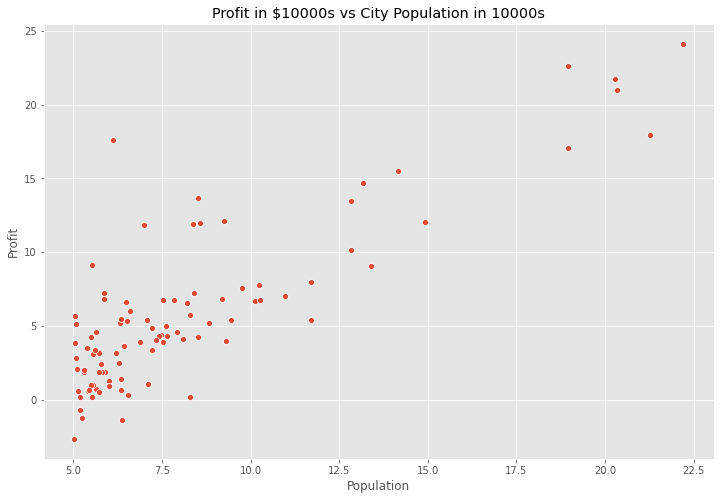

In [8]:
ax = sns.scatterplot(x="Population", y='Profit', data=data)
ax.set_title("Profit in $10000s vs City Population in 10000s")

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [9]:
def cost_func(x, y, theta):
    m = len(y)
    y_pred = x.dot(theta)
    error = (y_pred - y) ** 2
    
    return 1 / (2 * m) * np.sum(error)

In [20]:
m = data.Population.values.size
x = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2, 1))

cost_func(x, y, theta)

32.072733877455676

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [21]:
def grad_desc(x, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = x.dot(theta)
        error = np.dot(x.transpose(), y_pred - y)
        theta -= alpha * 1/m * error
        costs.append(cost_func(x, y, theta))
    return theta, costs

In [23]:
theta, costs = grad_desc(x, y, theta, alpha=0.0001, iterations=2000)
print("h(x) = {} + {}x1".format(str(round(theta[0,0], 2)),
                               str(round(theta[1,0], 2))))

h(x) = -1.22 + 0.92x1


In [24]:
from mpl_toolkits.mplot3d import Axes3D

In [25]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_vals = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_vals[i, j] = cost_func(x, y, t)

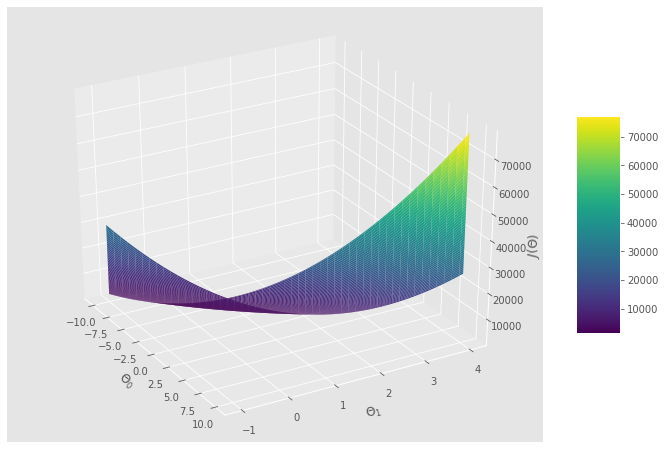

In [26]:
fig = plt.figure(figsize= (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_vals, cmap = 'viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30, 330)

plt.show()

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Vals of cost function over grad desc iterations')

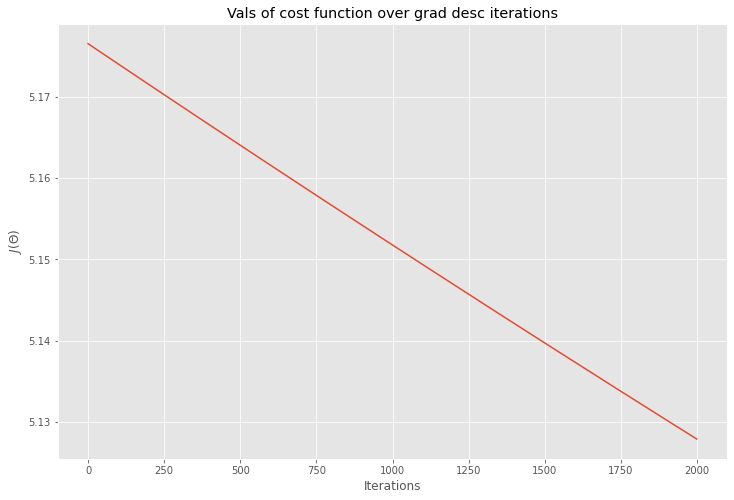

In [27]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Vals of cost function over grad desc iterations")

In [28]:
theta.shape

(2, 1)

In [29]:
theta

array([[-1.22185019],
       [ 0.9244083 ]])

Text(0.5, 1.0, 'Lin Reg Fit')

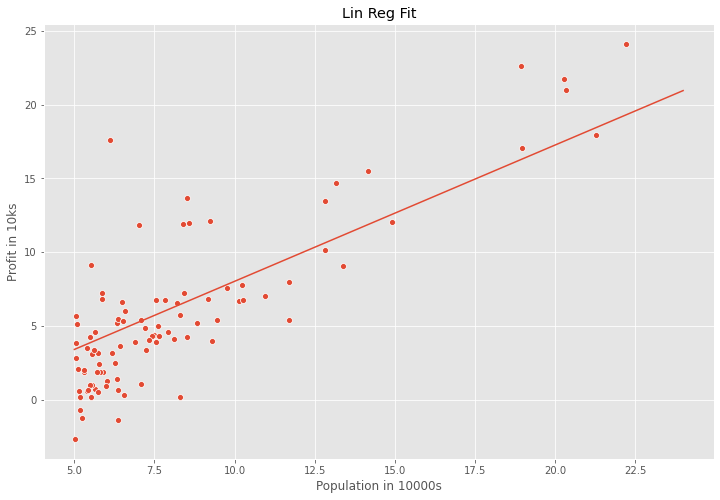

In [30]:
theta = np.squeeze(theta)
sns.scatterplot(x="Population", y="Profit", data=data)
x_val = [x for x in range(5, 25)]
y_val = [(x * theta[1] + theta[0]) for x in x_val]
sns.lineplot(x_val, y_val)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in 10ks")
plt.title("Lin Reg Fit")

$h_\theta(x) = \theta^Tx$

In [31]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [32]:
pred_40k = predict(np.array([1, 4]), theta) * 10000
print("For 40k people, the model predicts a profit of $" + str(round(pred_40k, 2)))

For 40k people, the model predicts a profit of $24757.83


In [33]:
pred_83k = predict(np.array([1, 8.3]), theta) * 10000
print("For 83k people, the model predicts a profit of $" + str(round(pred_83k, 2)))

For 83k people, the model predicts a profit of $64507.39
